- Going through the entire data analysis process to analyze a dataset on the chemical properties of wine and their associated quality readings
- Learning how to work with data using Pandas, Numpy and Matplotlib
- Data always requires a significant amount of work, to make it suitable for analysis like cleaning, feature engineering and visualizing. These packages make work faster and more efficient

- We will be analysing two datasets, one on red wine samples and the other on white wine samples from the North of Portugal
- Each wine sample comes with quality rating from one to ten and results from several physicl chemical tests

In [36]:
import pandas as pd
red_df = pd.read_csv('dataset/winequality-red.csv')
white_df = pd.read_csv('dataset/winequality-white.csv',)

In [37]:
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free sulfur dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


1. If you are the owner of a vineyard or a wine store and you are given this data, how might you use it
- Relevant Questions;
    * What chemical properties are most important on predicting the quality of wine?
    * Is a certain type of wine (red or white) associated with higher quality?
    * Do wines with higher alcoholic content receive better ratings?
    * Do sweeter wines (more residual settings) receive better ratings?
    * What level of acidity is associated with the highest quality?
2. How would you go about answering this questions? Which part of the dataset might you use?
- __Things to think about__
- Are there ways you could modify or represent the data differently to help you answer this question

### Assessing Data

In [32]:
print(red_df.shape)
red_df.info()

(1599, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [24]:
white_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [34]:
# checking for null values
red_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [29]:
# number of duplicate rows in the white dataset
# sum(white_df.duplicated())
white_df.duplicated().sum()

240

In [30]:
# unique values in the red wine dataset
red_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [31]:
white_df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [35]:
# mean density in the red wine dataset
red_df.density.mean()

0.9967466791744831

#### Appending and Markdown
- To analyse our data more efficiently lets combine the red and white datasets into one data frame
- Add a feature to each data frame indicating whether the wine is red or white to preserve each characteristic for each sample when the data frames are combined
- One way we can do this is by creating an array using numpy and add that as a column into each data frame

__Numpy__
- Short for Nnumerical python and is designed for efficient scientific computation. It's built on top of C

__Pandas__
- Built on top of numpy

In [3]:
import numpy as np
import pandas as pd

red_df = pd.read_csv('dataset/winequality-red.csv')
white_df = pd.read_csv('dataset/winequality-white.csv')
print(red_df.shape[0])


1599


In [71]:
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [72]:
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# renaming a column
# red_df.rename(columns={'free sulphur dioxide': 'free_sulphur_dioxide'}, inplace=True)
red_df.rename(columns={"free_sulphur-dioxide": "free_sulphur_dioxide"}, inplace=True)
red_df.head(2)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


__create color columns__
- create two arrays as long as the number of rows in the red and white dataframes that repeat the value red or white

In [5]:
# create colour array for red data frame
color_red = np.repeat("red", red_df.shape[0])

# colour array for white dataframe
color_white = np.repeat("white", white_df.shape[0])

In [6]:
# Adding the array to the red data frame by creating a column called color
red_df['color'] = color_red
red_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
# adding color array to the white data frame
white_df['color'] = color_white
white_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,white
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,white
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,white
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,white


#### Combining the data frames

In [48]:
# combining the two data frames
# wine_df = pd.concat([red_df, white_df])
wine_df = red_df.append(white_df, ignore_index=True)
wine_df.head()

/tmp/ipykernel_78308/3541057826.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  wine_df = red_df.append(white_df, ignore_index=True)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [49]:
# saving the combined dataset
wine_df.to_csv('dataset/wine_data.csv', index=False)

#### TroubleShooting with append
- Although the data was appended something strange happened with the free_sulphur dioxide
- In order to get the append statement to work correctly we need to rename the column in `red_df` so that it matches the column in the `white_df`

In [50]:
wine_data = pd.read_csv('dataset/wine_data.csv')
wine_data.shape
wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Exploring with visuals
- Performing explaratory data analysis on the newly combined data frame
- Create visulas to answer the quiz questons below;
    * Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol
    * Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? Volatile Acidity, Residual Sugar, pH, Alcohol

In [47]:
# loadind dataset
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset/wine_data.csv')
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


#### Histograms for various features

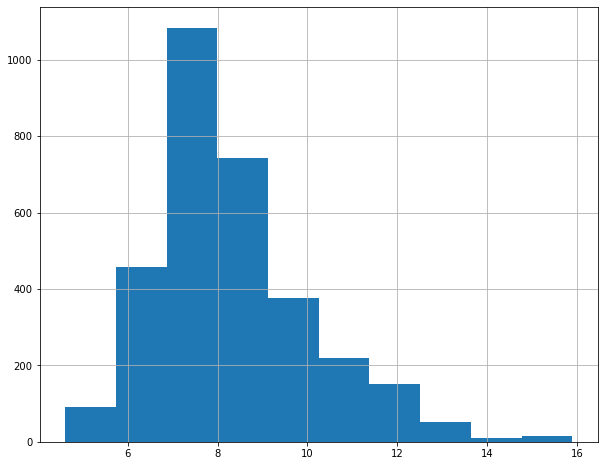

In [21]:
df.fixed_acidity.hist(figsize=(10,8));

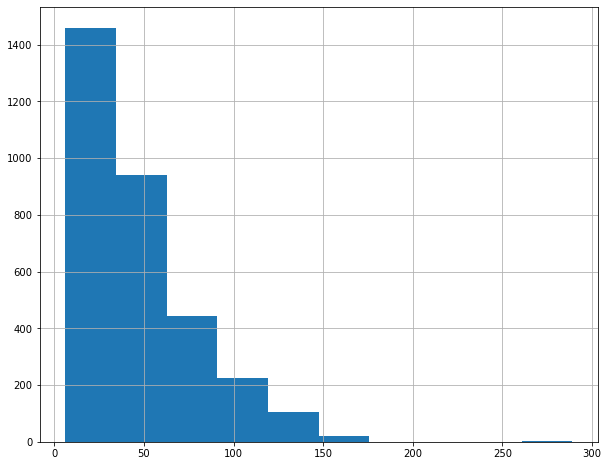

In [32]:
df.total_sulfur_dioxide.hist(figsize=(10,8));

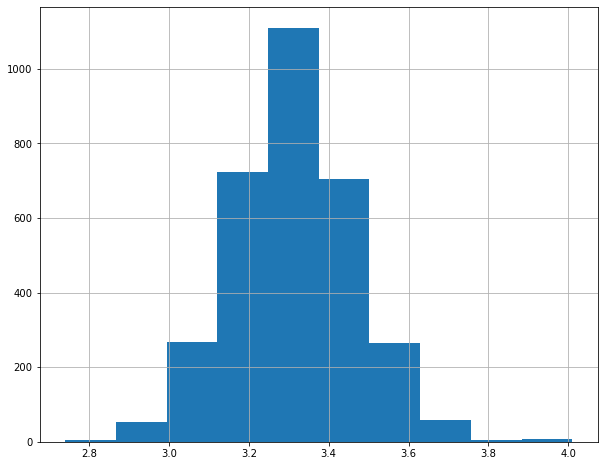

In [31]:
df.pH.hist(figsize=(10,8));

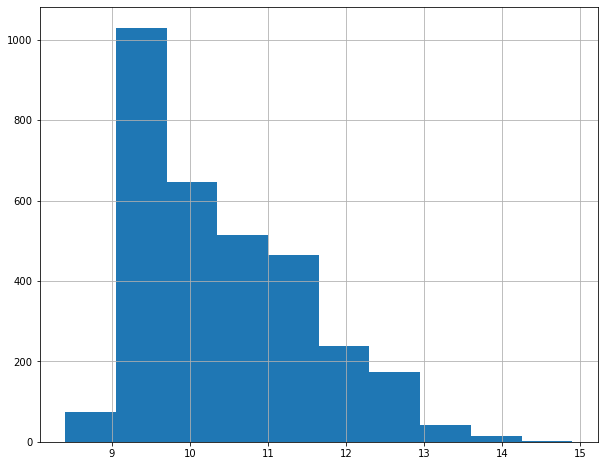

In [29]:
df.alcohol.hist(figsize=(10, 8));

### Scatterplots against various features

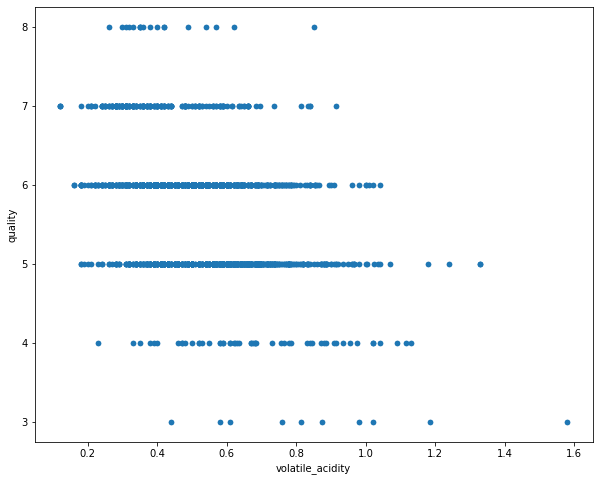

In [35]:
df.plot(kind='scatter', x='volatile_acidity', y='quality', figsize=(10, 8));

<AxesSubplot:xlabel='residual_sugar', ylabel='quality'>

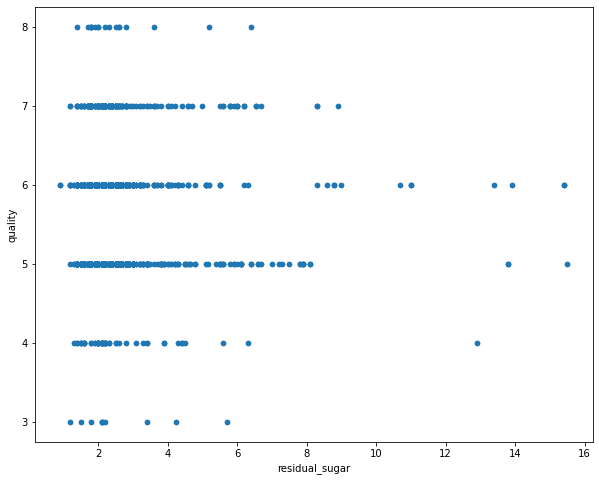

In [36]:
df.plot(kind="scatter", y="quality", x="residual_sugar", figsize=(10, 8))

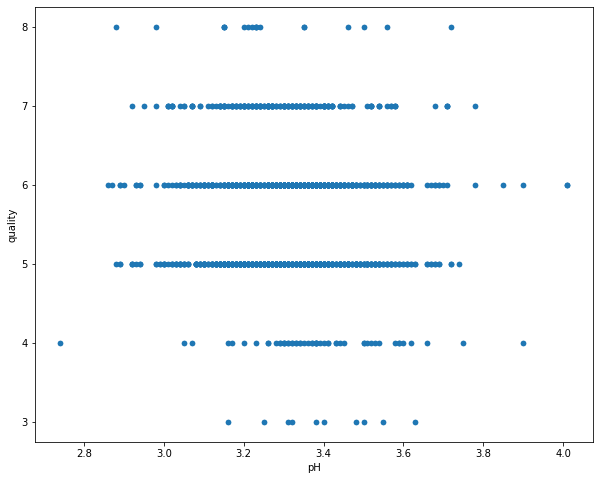

In [39]:
df.plot(kind="scatter", y="quality", x="pH", figsize=(10, 8));

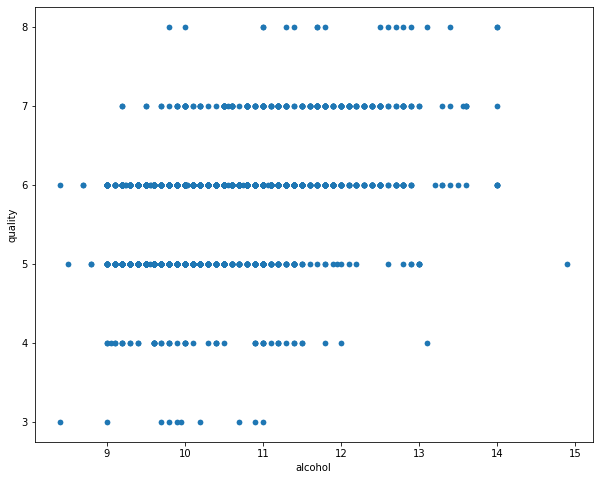

In [40]:
df.plot(kind="scatter", y="quality", x="alcohol", figsize=(10, 8));

### Pandas Groupby
- Groupby lets you group your data and aggregate information about those groups or perform group specific transformations
- We will use `groupby` to get summary statistics about different groups in our data
- Previously we learnt that we can get summary statistics on the whole dataset with functions like `describe` or `mean`
- From `mean()` I can find info like mean pH for all the samples in the data set
- What if I wanted to find the mean for each quality rating, eg the mean pH level for all samples of the quality rating of seven
- 

In [42]:
import pandas as pd
df = pd.read_csv("dataset/wine_data.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [43]:
df.mean()

/tmp/ipykernel_78308/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


fixed_acidity            8.319637
volatile_acidity         0.527821
citric_acid              0.270976
residual_sugar           2.538806
chlorides                0.087467
free_sulfur_dioxide     15.874922
total_sulfur_dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

In [45]:
# using group by combined with mean function to get mean pH level for all samples of quality rating of seven
# wine_data.groupby('quality').pH.mean()
wine_data.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


In [52]:
# splitting the data with multiple columns to groupby by providing a list
wine_data.groupby(['quality', 'color']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       8.360000          0.884500     0.171000        2.635000   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.779245          0.693962     0.174151        2.694340   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       8.167254          0.577041     0.243686        2.528855   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       8.347179          0.497484     0.273824        2.477194   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       8.872362          0.403920     0.375176        2.720603   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       8.566667          0.423333     0.391111        2.577778   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.122500            11.000000             24.900000  0.997464   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.090679            12.264151             36.245283  0.996542   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.092736            16.983847             56.513950  0.997104   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.084956            15.711599             40.869906  0.996615   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.076588            14.045226             35.020101  0.996104   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.068444            13.277778             33.444444  0.995212   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.398000   0.570000   9.955000  
4       red    3.381509   0.596415  10.265094  
        white  3.381509   0.596415  10.265094  
5       red    3.304949   0.620969   9.899706  
        white  3.304949   0.620969   9.899706  
6       red    3.318072   0.675329  10.629519  
        white  3.318072   0.675329  10.629519  
7       red    3.290754   0.741256  11.465913  
        white  3.290754   0.741256  11.465913  
8       red    3.267222   0.767778  12.094444  
        white  3.267222   0.767778  12.094444

In [54]:
# if you dont want the list as index
wine_data.groupby(['quality', 'color'], as_index=False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.398000
2,4,red,3.381509
3,4,white,3.381509
4,5,red,3.304949
5,5,white,3.304949
6,6,red,3.318072
7,6,white,3.318072
8,7,red,3.290754
9,7,white,3.290754


### Conclusions Using GroupBy
- __Q1__: Is a certain type of wine (red or white) associated with higher quality?
    - **_Hint_**: _compare the average quality of red wine with the average quality of white wine, group by color and the find the mean quality of each group_
- __Q2__: What level of acidity(pH value) receives the highest average rating?
    > **Note**: _unlike color which has clear categories, pH is a quantitative variable without clear categories_
    > **_Fix_**: _You can create a categorical variable from a quantitative variable by creating your own categories_
    - `cut` function lets you "cut" data into data groups, using this create a new column called acidity levels with these categories;
        
        **Acidity Levels**
        - High: Lowest 25% of pH values
        - Moderately High: 25% to 50% of pH values
        - Medium: 50% to 75% of pH values
        - Low: 75% to max pH value

    - Here the data is being split into 25th, 50th and 75th percentile. You can get these numbers with pandas `describe` 
    - After you create these 4 categories you'll be able to use `groupby` to get the mean quality rating for each acidity level

In [59]:
import pandas as pd
df = pd.read_csv("dataset/wine_data.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [60]:
df.groupby('color').quality.mean()

color
red      5.636023
white    5.636023
Name: quality, dtype: float64

In [63]:
# view the 25th, 50th and 75th percentile using describe
# df.groupby('color').quality.quantile([0.25, 0.5, 0.75])
# df.pH.describe()
# df['pH'].describe()
df.describe().pH

count    3198.000000
mean        3.311113
std         0.154362
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

In [64]:
# bin_edges that will be used to "cut" the data into groups
# Fill the list with five values you just found
bin_edges = [2.74, 3.21, 3.31, 3.40, 4.01]

In [65]:
# labels for the four acidity level groups
# Name each acidity level category
bin_names = ["high", "mod-high", "medium", "low"]

In [66]:
# create acidity level column
df['acidity_level'] = pd.cut(df.pH, bin_edges, labels=bin_names)
# df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)
df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,mod-high
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [67]:
# find the mean quality for each acidity level with groupby
df.groupby('acidity_level').quality.mean()

acidity_level
high        5.685579
mod-high    5.663317
medium      5.630769
low         5.563307
Name: quality, dtype: float64

In [68]:
# save the changes
df.to_csv('wine_data.csv', index=False)


#### Pandas Query
- In the previous lesson we selected rows in a data frame by indexing with maks;

    ```python
    # selecting malignant records in cancer data
    df_m = df[df['diagnosis'] == 'M']
    df_m = df.query('diagnosis == "M"')
    
    # selecting records of people making over $50K
    df_a = df[df['income'] == ' >50K']
    df_a = df.query('income == " >50K"')
    ```

- The above filtered columns contain strings
- You can also use query to filter columns containing numerical data like this

    ```python
    # selecting records in cancer data with radius greater than the median
    df_h = df[df['radius'] > 13.375]
    df_h = df.query('radius > 13.375')
    ```


#### Conclusions using query
- Investigating two questions using pandas query
- __Q1__: _Do wines with higher alcoholic content receive better ratings?_
    - **_Hint_**: Use query to create two groups of wine samples
        1. Low alcohol (samples with an alcohol content less than median)
        2. High alcohol (samples with an alcohol content greater than median)

        * Find the mean quality rating of each group
- __Q2__: Do sweeter wines, more residual settings recieve better ratings?
    - **_Hint_**: _Use the median to split the median into two groups by residual sugar and find the mean quality rating of each group

In [69]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,mod-high
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [74]:
# get the median of the alcohol content
# df.describe().alcohol
df.alcohol.median()

10.2

In [78]:
# select samples with alcohol content less than the median
# df.loc[df.alcohol < df.alcohol.median(), 'alcohol']
low_alcohol = df.query('alcohol < 10.2')

# select samples with alcohol content more than the median
high_alcohol = df.query('alcohol >= 10.2')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count()  # should be true

True

In [80]:
# mean quality ratings for low_alcohol and high_alcohol groups
low_alcohol.quality.mean(), high_alcohol.quality.mean()

(5.310106716886378, 5.959501557632398)

##### Do sweeter wines generally have higher ratings?

In [81]:
# get the median amount of residual sugar
df.residual_sugar.median()

2.2

In [83]:
# select samples with residual sugar less than median
low_sugar = df.query('residual_sugar < 2.2')

# samples with residual sugar greater than or equal to median
high_sugar = df.query('residual_sugar >= 2.2')

# ensuring the query included each sample exactly once
num_samples = df.shape[0]
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count()

True

In [84]:
# mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.602393617021277, 5.665879574970484)

### Type and quality plot
- Now that we've made some conclusions, we can create visualizations to display our findings regarding the associations between wine quality and different properties of wine

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

wine_df = pd.read_csv("dataset/wine_data.csv")
wine_df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

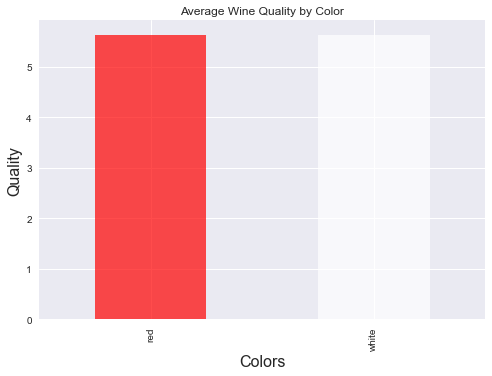

In [21]:
# creating visualizations to help us understand if a certain type of wine is associated with higher quality
# using the groupby results for the visualizations, we can also specify parameters for the title as well as the color and transparency of the bars
colors = ['red', 'white']
wine_df.groupby('color')['quality'].mean().plot(kind="bar", title="Average Wine Quality by Color", color=colors, alpha=.7)
# we dont want our white bar dissapearing into our white background
# At this point we cant get away with using only pandas
# Add matplotlib, pyplot is a module in matplotlib we'll use to create our plots
# import seaboen too, though we dont use it directly it has additional formatting to our plots that make them more aesthetically pleasing than standard matplotlib

# with matplotlib we can set x and y labels
plt.xlabel('Colors', fontsize=16);
plt.ylabel('Quality', fontsize=16);
plt.style.use("seaborn")
# plt.style.available


In [111]:
# Although this visual shows us that the white the white wine samples are equal to red wine samples in quality ratings, it would be nice if we get more deatils on where that is coming from
# Putting a more detailed bar chat, counts for each quality rating by color
counts = wine_df.groupby(['quality', 'color']).count
counts()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             10                10           10              10   
4       red               53                53           53              53   
        white             53                53           53              53   
5       red              681               681          681             681   
        white            681               681          681             681   
6       red              638               638          638             638   
        white            638               638          638             638   
7       red              199               199          199             199   
        white            199               199          199             199   
8       red               18                18           18              18   
        white             18                18           18              18   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         10                   10                    10       10   
4       red           53                   53                    53       53   
        white         53                   53                    53       53   
5       red          681                  681                   681      681   
        white        681                  681                   681      681   
6       red          638                  638                   638      638   
        white        638                  638                   638      638   
7       red          199                  199                   199      199   
        white        199                  199                   199      199   
8       red           18                   18                    18       18   
        white         18                   18                    18       18   

                pH  sulphates  alcohol  
quality color                           
3       red     10         10       10  
        white   10         10       10  
4       red     53         53       53  
        white   53         53       53  
5       red    681        681      681  
        white  681        681      681  
6       red    638        638      638  
        white  638        638      638  
7       red    199        199      199  
        white  199        199      199  
8       red     18         18       18  
        white   18         18       18

Text(0, 0.5, 'Count')

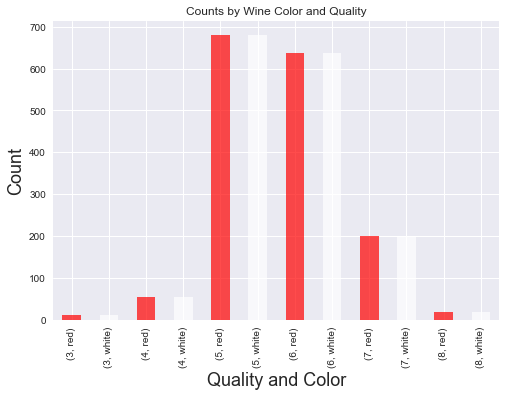

In [22]:
#  Because this are counts the values for all the columns will be the same, so we'll just pick an arbitrary one
counts = wine_df.groupby(['quality', 'color']).count()['pH']
colors = ['red', 'white']
counts.plot(kind='bar', title='Counts by Wine Color and Quality',
            color=colors, alpha=.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Count', fontsize=18)

Text(0, 0.5, 'Proportion')

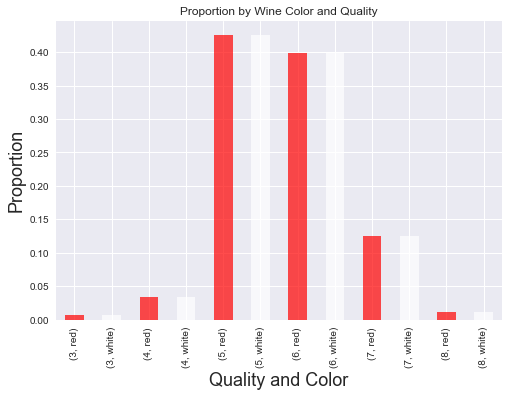

In [23]:
# In the above plot theres clearly equal samples but itshard to make a fair comparison with just count
# To balance it out lets divide each count by the total count for that color to use proportions instead
totals = wine_df.groupby('color').count()['pH']
proportions = counts / totals
proportions.plot(
    kind='bar', title='Proportion by Wine Color and Quality', color=colors, alpha=.7)
plt.xlabel('Quality and Color', fontsize=18)
plt.ylabel('Proportion', fontsize=18)

- In the graph above for the lower ratings 3, 4 ans 5  and higher ratings 6, 7, 8 and 9 both red and white samples show equal proportions
- The data looks good but the tick labels on the x and y axis look messy
- It would be nice to have the red and white bar for each rating next to each other
- We are also missing a spot for the quality rating of 9, although the number is zero that value should still be there
- Since alot of customizations are needed it would make more sense to plot directly on matplotlib than on pandas

__Matplotlib__

<BarContainer object of 3 artists>

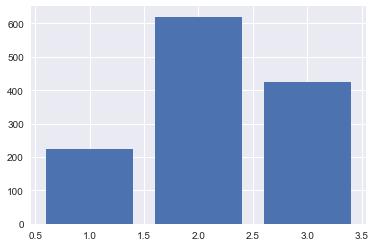

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

# creating a bar chat using matplotlib
# x coordinates of the bars and heights of the bars
plt.bar([1, 2, 3], [224, 620, 425])

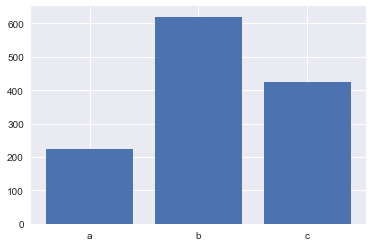

In [26]:
# plot bars
plt.bar([1, 2, 3], [224, 620, 425])

# specify x coordinates of tick labels and their labels
plt.xticks([1, 2, 3], ['a', 'b', 'c']);


<BarContainer object of 3 artists>

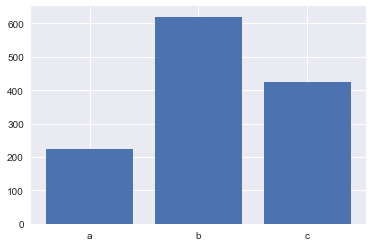

In [27]:
# plot bars with x tick labels
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c'])


Text(0, 0.5, 'Some Y Label')

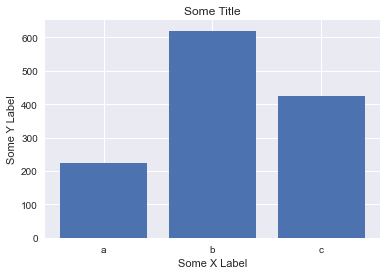

In [28]:
plt.bar([1, 2, 3], [224, 620, 425], tick_label=['a', 'b', 'c'])
plt.title('Some Title')
plt.xlabel('Some X Label')
plt.ylabel('Some Y Label')
